In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

## Ejercicio 3.1

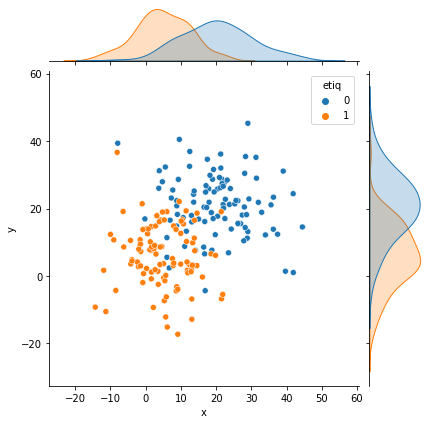

In [2]:
np.random.seed(1)

df1= pd.DataFrame(np.random.normal(scale=10, size=(100,3))+20,columns=["x","y", "etiq"])
df2= pd.DataFrame(np.random.normal(scale=8, size=(100,3))+5,columns=["x","y", "etiq"])
df1["etiq"]= 0
df2["etiq"]= 1
datos = pd.concat([df1,df2], ignore_index=True)
sns.jointplot(data=datos, x="x", y="y", kind="scatter", hue="etiq")

Separo la muestra en entrenamiento y validacion

In [3]:
from sklearn.model_selection import train_test_split
X= datos[['x','y']].to_numpy()
y= datos[['etiq']].to_numpy()
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.5, random_state=42)


Instancio un clasificador K Neighbors con K=10 y lo entreno

In [4]:
clasi = KNeighborsClassifier(n_neighbors=10)
clasi.fit(X_train, y_train.ravel()) 

KNeighborsClassifier(n_neighbors=10)

Realizo la predicción con los datos de validación

In [5]:
exactitud= clasi.score(X_test, y_test)
exactitud

0.87

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


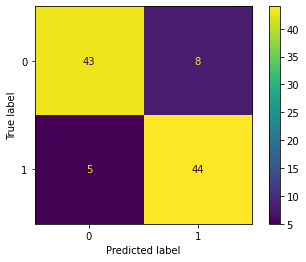

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
y_pred= clasi.predict(X_test)
c=confusion_matrix(y_test, y_pred)

metrics.plot_confusion_matrix(clasi,X_test,y_test)

In [7]:
A=classification_report(y_test, y_pred)
print(A)
# metrics.plot_roc_curve(clasi, X_test,y_test)
# metrics.plot_precision_recall_curve(clasi, X_test,y_test)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        51
           1       0.85      0.90      0.87        49

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



(-14.408024009390301,
 44.593686490613976,
 -17.360275741223383,
 45.38325706806398)

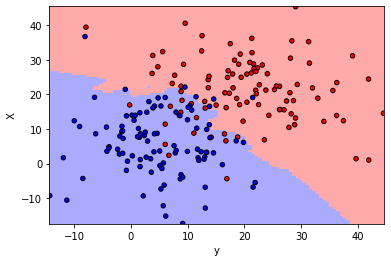

In [8]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = clasi.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


plt.scatter(X[:, 0], X[:, 1], c=y[:,0], cmap=cmap_bold,edgecolor='k', s=20)
plt.xlabel('y')
plt.ylabel('X')
plt.axis('tight')

Itero K y observo los resultados graficando la exactitud del entrenamiento y del test

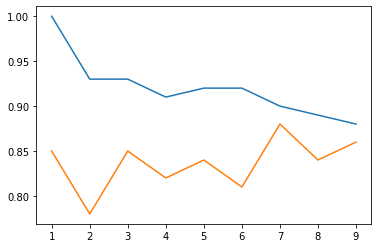

In [9]:
vecinos= np.arange(1,10)
exactitud_train= np.zeros(len(vecinos))
exactitud_test= np.zeros(len(vecinos))
for i,k in enumerate (vecinos):
    clasi = KNeighborsClassifier(n_neighbors=k)
    clasi.fit(X_train, y_train.ravel())
    exactitud_train[i]= clasi.score(X_train, y_train)
    exactitud_test[i]= clasi.score(X_test, y_test)
    
plt.plot(vecinos, exactitud_train)
plt.plot(vecinos, exactitud_test)

Ahora, voy a modificar el porcentaje de train/test, pasa a ser 80/20

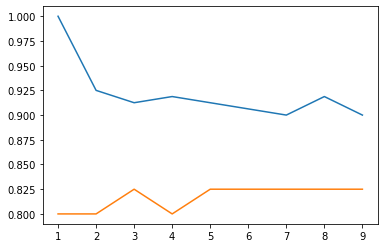

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)
vecinos= np.arange(1,10)
exactitud_train= np.zeros(len(vecinos))
exactitud_test= np.zeros(len(vecinos))
for i,k in enumerate (vecinos):
    clasi = KNeighborsClassifier(n_neighbors=k)
    clasi.fit(X_train, y_train.ravel())
    exactitud_train[i]= clasi.score(X_train, y_train)
    exactitud_test[i]= clasi.score(X_test, y_test)
    
plt.plot(vecinos, exactitud_train)
plt.plot(vecinos, exactitud_test)

Modifico los centrides, los acerco y vuelvo a 50/50

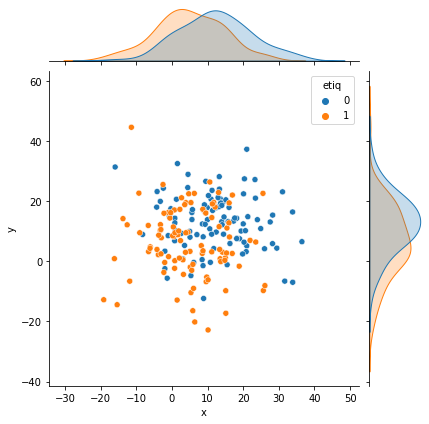

In [11]:
np.random.seed(1)

df1= pd.DataFrame(np.random.normal(scale=10, size=(100,3))+12,columns=["x","y", "etiq"])
df2= pd.DataFrame(np.random.normal(scale=10, size=(100,3))+5,columns=["x","y", "etiq"])
df1["etiq"]= 0
df2["etiq"]= 1
datos = pd.concat([df1,df2], ignore_index=True)
sns.jointplot(data=datos, x="x", y="y", kind="scatter", hue="etiq")
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.5, random_state=42)

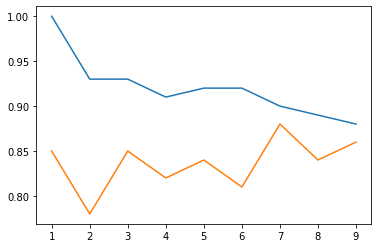

In [12]:
vecinos= np.arange(1,10)
exactitud_train= np.zeros(len(vecinos))
exactitud_test= np.zeros(len(vecinos))
for i,k in enumerate (vecinos):
    clasi = KNeighborsClassifier(n_neighbors=k)
    clasi.fit(X_train, y_train.ravel())
    exactitud_train[i]= clasi.score(X_train, y_train)
    exactitud_test[i]= clasi.score(X_test, y_test)
    
plt.plot(vecinos, exactitud_train)
plt.plot(vecinos, exactitud_test)

## Ejercicio 3.2

In [13]:
#UTILIZO K-FOLD con 5 vecinos y 5 splits
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle= True, random_state=2)
clasi = KNeighborsClassifier(n_neighbors=5)
# for valores_x, valores_y in kf.split(X):
#     #print("Entrenamiento:", datos.iloc[valores_x], "Prueba: ", datos.iloc[valores_y])
#     print(valores_x, valores_y)
for train_index, test_index in kf.split(X):
    X_train, X_test= X[test_index], X[train_index]
    y_train, y_test= y[test_index], y[train_index]
    
    clasi.fit(X_train, y_train.ravel())
    y_pred= clasi.predict(X_test)
    print("Exactitud train:",clasi.score(X_train, y_train))
    print("Exactitud test:",clasi.score(X_test, y_test))
    print("----------------------------")
    

Exactitud train: 0.85
Exactitud test: 0.86875
----------------------------
Exactitud train: 0.9
Exactitud test: 0.8125
----------------------------
Exactitud train: 0.95
Exactitud test: 0.88125
----------------------------
Exactitud train: 0.875
Exactitud test: 0.8625
----------------------------
Exactitud train: 0.925
Exactitud test: 0.85625
----------------------------


Utilizo GridSearch, le doy valores de n de 2 a 10 y realizó una cros validation de 5 partes. Además le doy parametros de peso y metrica.

In [14]:
#Utilizo Grid Search
from sklearn.model_selection import GridSearchCV
# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.5, random_state=42)
parametros= {
    'n_neighbors':[2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
gs= GridSearchCV(KNeighborsClassifier(),
                 parametros,
                 verbose=1, 
                 cv=5, 
                 n_jobs=-1
                )

gs_resultados= gs.fit(X, y.ravel())
print(gs.best_params_) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


## Ejercicio 3.3

In [15]:
#leemos el dataset
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [16]:
attributes_spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


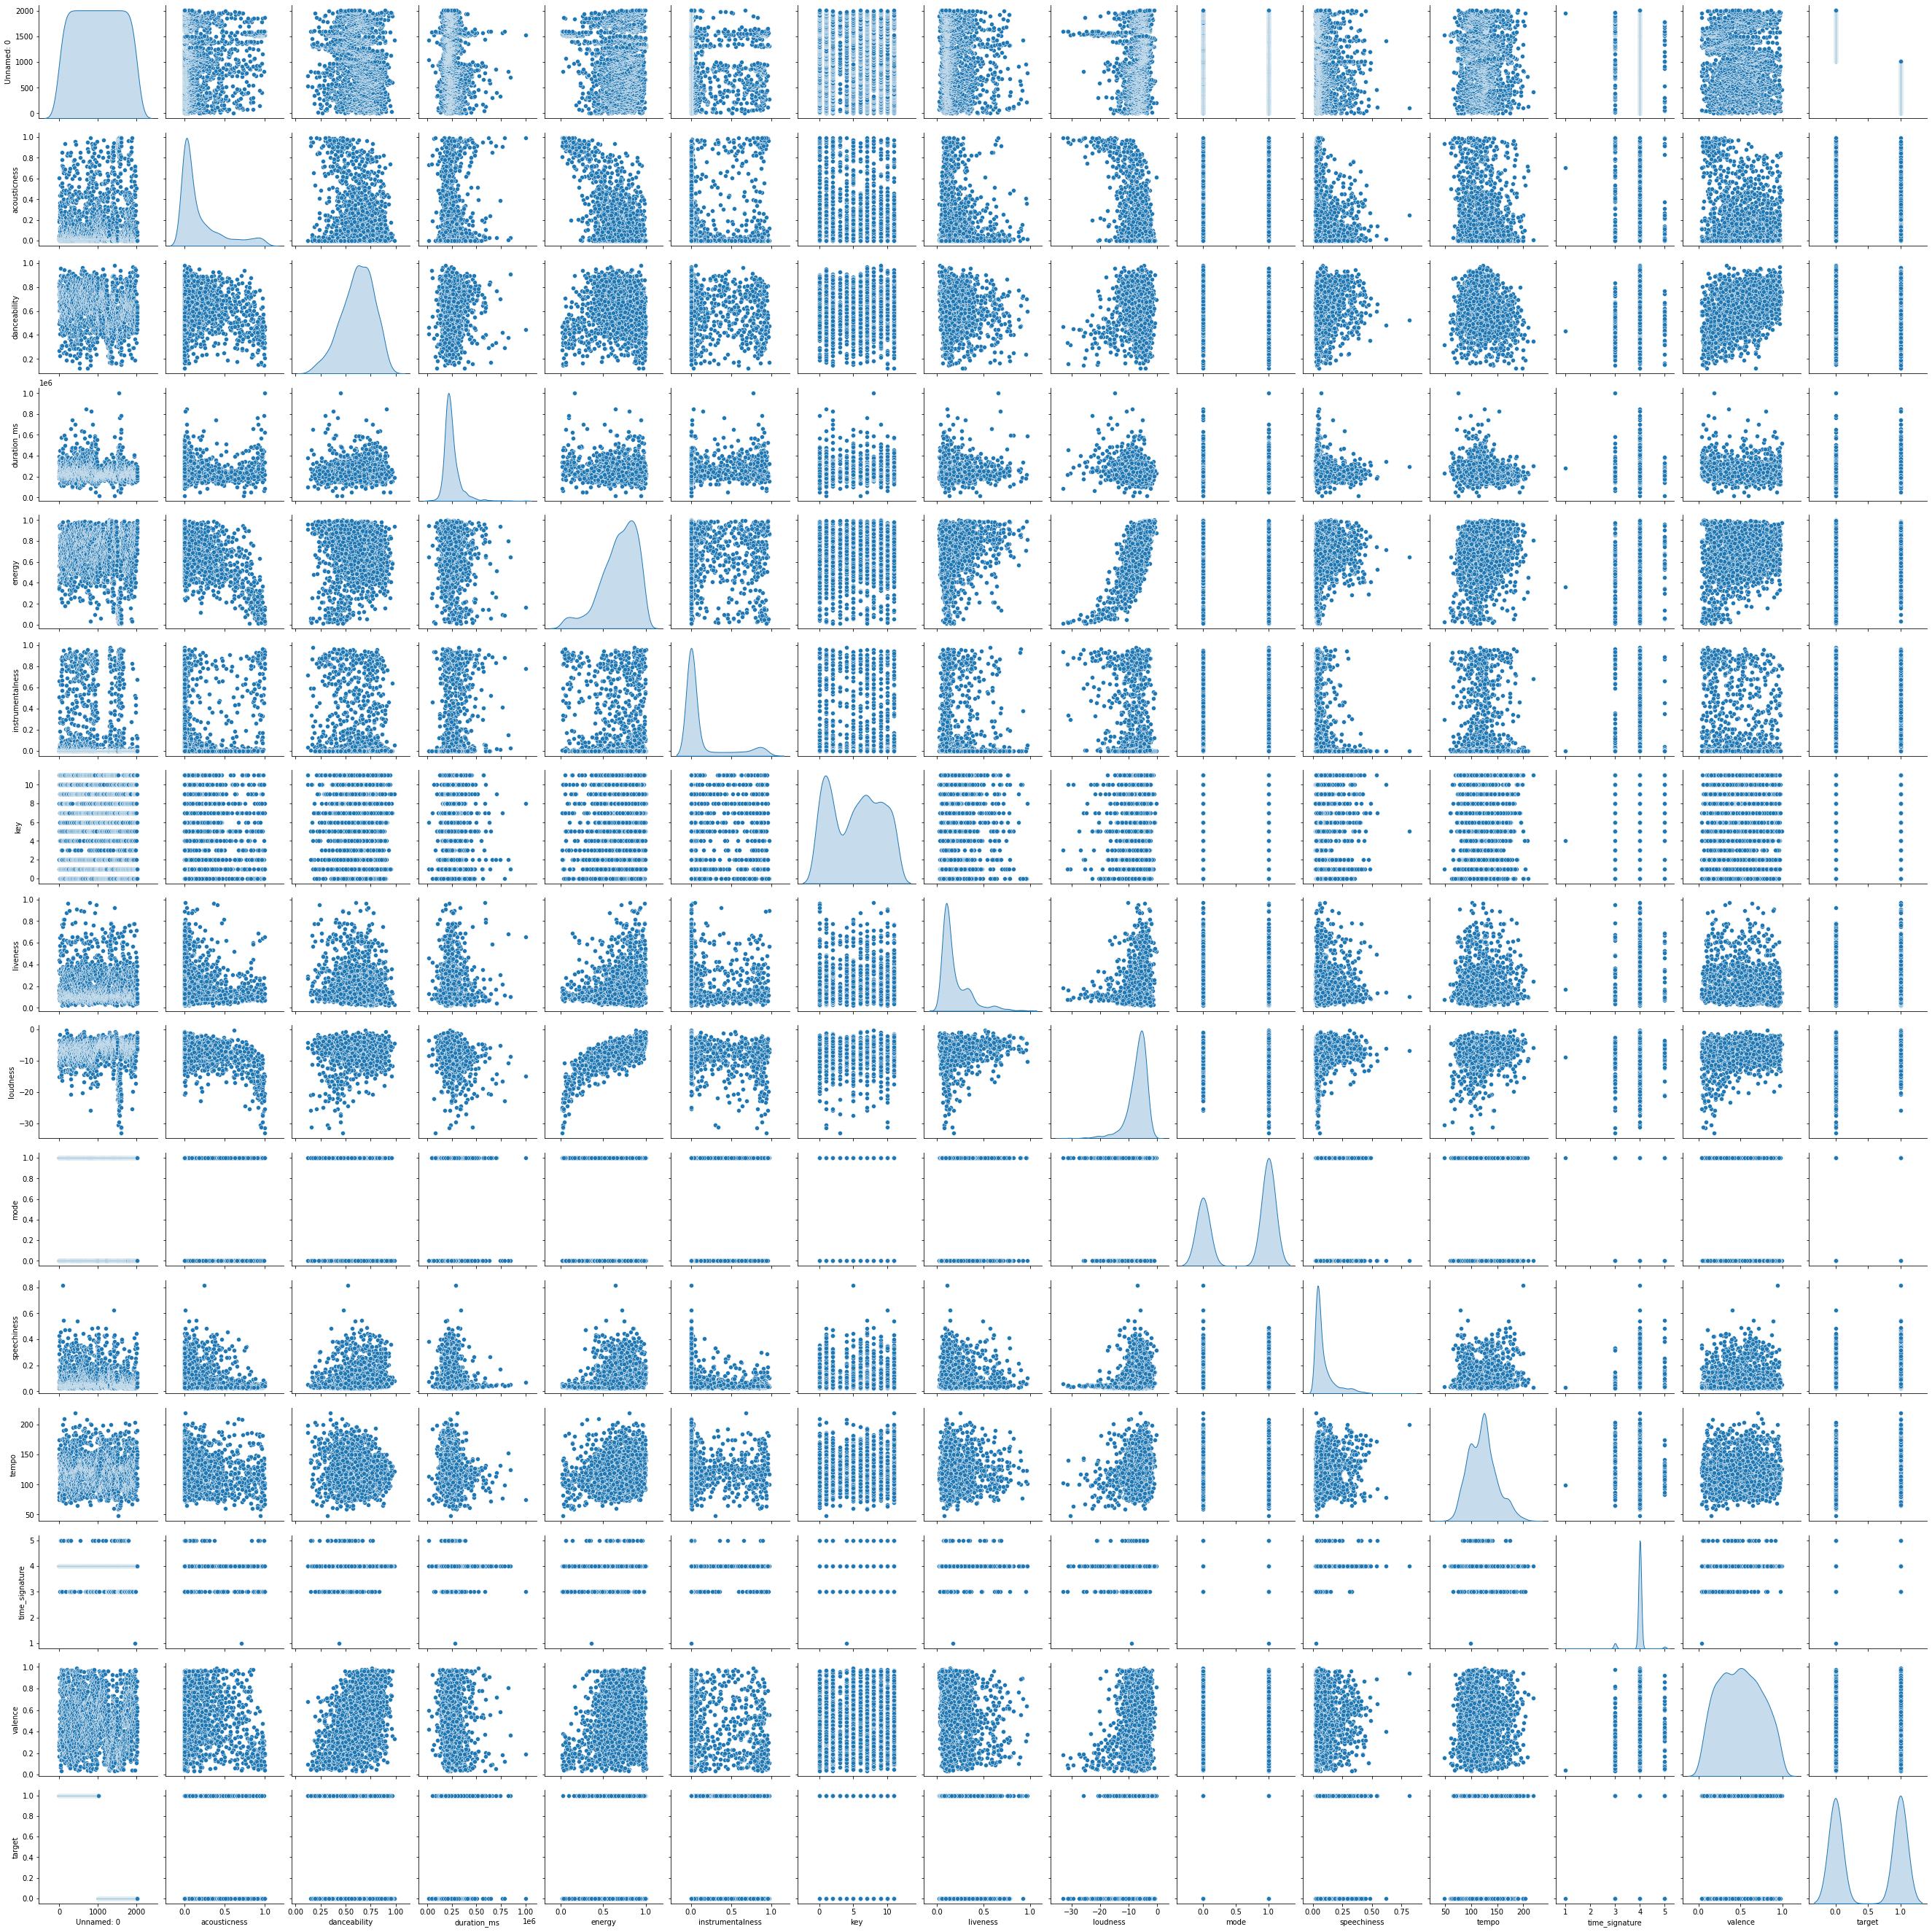

In [17]:
datos= pd.DataFrame(attributes_spotify)
sns.pairplot(datos, diag_kind="kde")

Cuantifico los datos de Nombre de artista

In [18]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
datos['codigo_art'] = LE.fit_transform(datos['artist'])
datos

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,codigo_art
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future,449
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino,222
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future,449
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House,95
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys,628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise,662
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis,335
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man,947
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons,1242


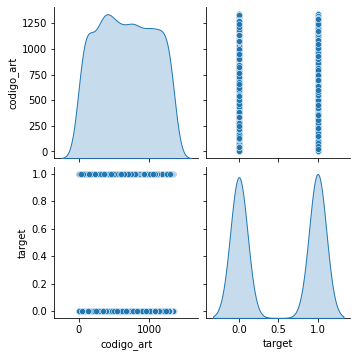

In [19]:
sns.pairplot(datos, x_vars= ['codigo_art','target'], y_vars= ['codigo_art','target'],diag_kind="kde" )

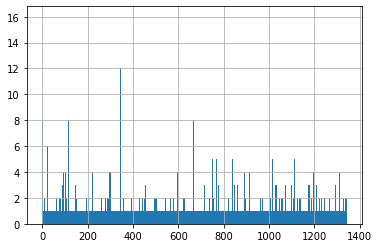

In [20]:
datos['codigo_art'].hist(bins=datos['codigo_art'].max())

In [21]:
moda=datos.codigo_art.mode()
datos[datos.codigo_art==moda[0]]

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,codigo_art
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake,356
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake,356
37,37,0.05650,0.853,205879,0.547,0.000000,1,0.3410,-7.535,1,0.1940,142.065,4.0,0.677,1,Jumpman,Drake,356
117,117,0.00257,0.896,267024,0.623,0.000258,2,0.0390,-8.008,1,0.0571,134.962,4.0,0.564,1,Hotline Bling,Drake,356
154,154,0.00157,0.790,217707,0.676,0.000000,8,0.2500,-6.432,0,0.2710,132.002,4.0,0.314,1,Big Rings,Drake,356
158,158,0.19000,0.735,275840,0.410,0.000000,11,0.3410,-8.735,0,0.2000,114.812,4.0,0.160,1,Know Yourself,Drake,356
168,168,0.04720,0.849,217693,0.408,0.000000,6,0.1010,-8.670,0,0.2840,99.876,4.0,0.337,1,Wu-Tang Forever,Drake,356
440,440,0.36900,0.662,236733,0.571,0.000197,6,0.0908,-7.382,0,0.1060,152.009,4.0,0.442,1,Headlines,Drake,356
589,589,0.04250,0.790,173160,0.531,0.000000,8,0.2660,-6.968,1,0.1970,86.306,4.0,0.498,1,Started From the Bottom,Drake,356
676,676,0.00300,0.766,227027,0.453,0.000035,6,0.0923,-6.651,0,0.0670,100.002,4.0,0.346,1,"Hold On, We're Going Home",Drake,356


In [22]:
datos_n= datos.rename(columns={'mode':'modo'})


Normalizo los datos 

In [23]:
datos_n.duration_ms=datos_n.duration_ms/datos_n.duration_ms.max()
datos_n.tempo=datos_n.tempo/datos_n.tempo.max()
datos_n.key=datos_n.key/datos_n.key.max()
datos_n.time_signature=datos_n.time_signature/datos_n.time_signature.max()
datos_n.codigo_art=datos_n.codigo_art/datos_n.codigo_art.max()
datos_n.loudness=(datos_n.loudness+datos_n.loudness.min())/datos_n.loudness.max()
datos_n.speechiness=(datos_n.speechiness)/datos_n.speechiness.max()
datos_n.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,modo,speechiness,tempo,time_signature,valence,target,codigo_art
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,0.245172,0.681577,0.133286,0.485690,0.190844,130.888027,0.612295,0.113559,0.554428,0.793654,0.496815,0.505702,0.496138
std,582.402066,0.259989,0.161029,0.081604,0.210273,0.273162,0.331658,0.155453,12.253043,0.487347,0.110210,0.121668,0.051171,0.247195,0.500091,0.289767
min,0.000000,0.000003,0.122000,0.015968,0.014800,0.000000,0.000000,0.018800,108.807818,0.000000,0.028309,0.218204,0.200000,0.034800,0.000000,0.000000
25%,504.000000,0.009630,0.514000,0.199094,0.563000,0.000000,0.181818,0.092300,123.267101,0.000000,0.045956,0.456794,0.800000,0.295000,0.000000,0.257079
50%,1008.000000,0.063300,0.631000,0.228205,0.715000,0.000076,0.545455,0.127000,128.159609,1.000000,0.067279,0.553624,0.800000,0.492000,1.000000,0.491058
75%,1512.000000,0.265000,0.738000,0.269088,0.846000,0.054000,0.818182,0.247000,135.149837,1.000000,0.132353,0.628498,0.800000,0.691000,1.000000,0.747392
max,2016.000000,0.995000,0.984000,1.000000,0.998000,0.976000,1.000000,0.969000,215.615635,1.000000,1.000000,1.000000,1.000000,0.992000,1.000000,1.000000


Utilizo el gridsearch para realizar un entrenamiento de un Knn con K de 2 a 10, además pruebo diferentes parámetros de peso y metrica.
Para entrenar utilizo todos los atributos númericos, a exepción de 'unnamed'.

In [24]:
X= datos_n[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','modo','speechiness','tempo','time_signature','valence','codigo_art']].to_numpy()
# X= datos_n[['duration_ms']].to_numpy()
y= datos_n[['target']].to_numpy()
parametros= {
    'n_neighbors':[2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
gs= GridSearchCV(KNeighborsClassifier(),
                 parametros,
                 verbose=1, 
                 cv=5, 
                 n_jobs=-1
                )

gs_resultados= gs.fit(X, y.ravel())
print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
0.6137373166597057


Utilizo solo el nombre del artista como entrada

In [25]:
X= datos_n[['codigo_art']].to_numpy()
# X= datos_n[['duration_ms']].to_numpy()
y= datos_n[['target']].to_numpy()
parametros= {
    'n_neighbors':[2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
gs= GridSearchCV(KNeighborsClassifier(),
                 parametros,
                 verbose=1, 
                 cv=5, 
                 n_jobs=-1
                )

gs_resultados= gs.fit(X, y.ravel())
print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.6390622312851633


Utilizo el nombre del artista y la duración. 

In [26]:
X= datos_n[['duration_ms','codigo_art']].to_numpy()
# X= datos_n[['duration_ms']].to_numpy()
y= datos_n[['target']].to_numpy()
parametros= {
    'n_neighbors':[2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
gs= GridSearchCV(KNeighborsClassifier(),
                 parametros,
                 verbose=1, 
                 cv=5, 
                 n_jobs=-1
                )

gs_resultados= gs.fit(X, y.ravel())
print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
0.5890106380365084


Utilizo solo los atributos que tienen que ver con la teoría musical.

In [27]:
X= datos_n[['key','modo','speechiness','tempo','time_signature']].to_numpy()
# X= datos_n[['duration_ms']].to_numpy()
y= datos_n[['target']].to_numpy()
parametros= {
    'n_neighbors':[2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
gs= GridSearchCV(KNeighborsClassifier(),
                 parametros,
                 verbose=1, 
                 cv=5, 
                 n_jobs=-1
                )

gs_resultados= gs.fit(X, y.ravel())
print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
0.5790863081345355


Utilizo los atributos que terminan en ness

In [28]:
X= datos_n[['acousticness','instrumentalness','liveness','loudness','speechiness',]].to_numpy()
# X= datos_n[['duration_ms']].to_numpy()
y= datos_n[['target']].to_numpy()
parametros= {
    'n_neighbors':[2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
gs= GridSearchCV(KNeighborsClassifier(),
                 parametros,
                 verbose=1, 
                 cv=5, 
                 n_jobs=-1
                )

gs_resultados= gs.fit(X, y.ravel())
print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.6122693658944058


## Conclusiones
De los entrenamientos realizo se obtiene el mejor score utilizando todos los atributos numéricos y los siguientes hiperparámetros:
{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'} Score 0.6484890548608211
Aunque si entrenamos sólo con código de arista, se obtiene un score similar, utilizando los siguientes hyperparámetros:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Score: 0.6405424661572856
Aunque este último clasificador no será eficaz en un dataset donde hayan nuevos artistas, ya que no tendra ningún parámetro para poder clasificarlos.

## FIN